Summarization of articles papers

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

tokenizer = AutoTokenizer.from_pretrained("facebook/bart-large-cnn")

model = AutoModelForSeq2SeqLM.from_pretrained("facebook/bart-large-cnn")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

In [ ]:
file_path = os.path.join("/content/drive/MyDrive/", 'papers_new.xlsx')
file = pd.read_excel(file_path)




In [ ]:
# remove articles with missing values or duplicates

file.dropna(inplace=True)
file.drop_duplicates(inplace=True)

# get a df with only 1000 rows

file = file.iloc[:6500, :]
file.shape

(6500, 4)

In [ ]:
file.head()

,paper_id,title,abstract,full-text
0,97de2cec75e4557f014e5ecbc4db7885ced49c68,Neuroimmune multi-hit perspective of coronavir...,Abstract\n\nIt is well accepted that environme...,Background\n\nSophisticated defensive strategi...
1,5c9bbf96e1a04c87f7a76f783f00ddf4af3c688e,Gender Differences in COVID-19 Conspiracy Theo...,"Abstract\n\nIn this article, we evaluate gende...","\n\n2020a, 2020b; Uscinski et al. 2020) . In t..."
2,26e4e16e5c03a202e957a932439aed7e713b2115,Estimated number of N95 respirators needed for...,Abstract\n\nObjective: Due to shortages of N95...,\n\nResults: For an acute-care hospital with 4...
3,71ff1959c1833b0a89a9f3fde26c63e38859f4dc,O R I G I N A L A R T I C L E,Abstract\n\nObjectives: To report changes in p...,| INTRODUC TI ON\n\nThe SARS- pandemic led to ...
4,2116036d1757b01907eafaf770bf2ca4e142ab06,Journal Pre-proof Addressing the impact of COV...,Abstract\n\n Administrative buildings showed ...,Introduction\n\nThe outbreak of COVID-19 was f...


In [ ]:
# Get ride of Abstract keyword

file['abstract'] = file['abstract'].apply(lambda x: x.upper().split('ABSTRACT\n\n')[1])
file['full-text'] = file['full-text'].apply(lambda x: x.upper().split('REFERENCES')[0])

file['abstract'] = file['abstract'].apply(lambda x: x.capitalize().strip())
file['full-text'] = file['full-text'].apply(lambda x: x.capitalize().strip())
file.head(30)

,paper_id,title,abstract,full-text
0,97de2cec75e4557f014e5ecbc4db7885ced49c68,Neuroimmune multi-hit perspective of coronavir...,It is well accepted that environmental stresso...,Background\n\nsophisticated defensive strategi...
1,5c9bbf96e1a04c87f7a76f783f00ddf4af3c688e,Gender Differences in COVID-19 Conspiracy Theo...,"In this article, we evaluate gender difference...","2020a, 2020b; uscinski et al. 2020) . in this ..."
2,26e4e16e5c03a202e957a932439aed7e713b2115,Estimated number of N95 respirators needed for...,Objective: due to shortages of n95 respirators...,results: for an acute-care hospital with 400 a...
3,71ff1959c1833b0a89a9f3fde26c63e38859f4dc,O R I G I N A L A R T I C L E,Objectives: to report changes in practice brou...,| introduc ti on\n\nthe sars- pandemic led to ...
4,2116036d1757b01907eafaf770bf2ca4e142ab06,Journal Pre-proof Addressing the impact of COV..., administrative buildings showed a 38% reduct...,Introduction\n\nthe outbreak of covid-19 was f...
6,b9b79c608502d617b11b08e683c80cba45d7dcbf,Molecular Sciences Inflammatory Mechanisms in ...,"Citation: sagris, m.; theofilis, p.; antonopou...",Introduction\n\ninitially affecting inhabitant...
7,c4089cd52cfb889278c3d5e33d444973cedee0b2,Journal Pre-proof Safety and Effectiveness of ...,Background: 5 the long-term safety results of ...,Introduction\n\naccording to the world health ...
8,675832b6554c5bc01bca73843c8c74ef548315cd,"Evaluation of the efficacy, safety, and stabil...",Background: myopic anisometropic amblyopia in ...,"Conclusions:\n\nthe present study, with the lo..."
10,07696cd83ef263c7178e84646938a9097d7e881f,-NC-ND license Cinnamon and its possible impac...,The covid-19 global epidemic caused by coronav...,"system responds to the infection, and a cytoki..."
11,06c2668f8668e2af7be948be436f7d8a1f66533f,Towards an antifragile urban form: a research ...,This paper aims to initiate reflections on wha...,Introduction\n\nthe primary aim of this paper ...


In [ ]:
# tokenization
def preprocess_function(batch):
  source = [str(i) for i in batch[['full-text']].values]
  target = [str(i) for i in batch[['abstract']].values]


  source_ids = tokenizer(source, max_length=1024, padding='max_length', truncation=True)
  target_ids = tokenizer(target, max_length=128, padding='max_length', truncation=True)
  labels = target_ids["input_ids"]
  # labels = [[(l if l != tokenizer.pad_token_id else -100) for l in label] for label in labels]

  return {"input_ids": source_ids["input_ids"], "attention_mask": source_ids["attention_mask"], "labels": labels}

In [ ]:
# preprocessing of the articles using batched=True
tokenized_dataset = preprocess_function(file)
token_df = pd.DataFrame(tokenized_dataset, columns=['input_ids', 'attention_mask', 'labels'], index=file.index)


In [ ]:
df_source = pd.concat([file, token_df], axis=1, join='inner').reset_index(drop=True)

In [ ]:
df_source.head(30)

,paper_id,title,abstract,full-text,input_ids,attention_mask,labels
0,97de2cec75e4557f014e5ecbc4db7885ced49c68,Neuroimmune multi-hit perspective of coronavir...,It is well accepted that environmental stresso...,Background\n\nsophisticated defensive strategi...,"[0, 48759, 48277, 37457, 282, 37457, 6852, 667...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 48759, 243, 16, 157, 3903, 14, 3039, 3992,..."
1,5c9bbf96e1a04c87f7a76f783f00ddf4af3c688e,Gender Differences in COVID-19 Conspiracy Theo...,"In this article, we evaluate gender difference...","2020a, 2020b; uscinski et al. 2020) . in this ...","[0, 48759, 24837, 102, 6, 2760, 428, 131, 201,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 48759, 1121, 42, 1566, 6, 52, 10516, 3959,..."
2,26e4e16e5c03a202e957a932439aed7e713b2115,Estimated number of N95 respirators needed for...,Objective: due to shortages of n95 respirators...,results: for an acute-care hospital with 400 a...,"[0, 49329, 38547, 35, 13, 41, 13827, 12, 6350,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 48759, 46674, 2088, 35, 528, 7, 12737, 9, ..."
3,71ff1959c1833b0a89a9f3fde26c63e38859f4dc,O R I G I N A L A R T I C L E,Objectives: to report changes in practice brou...,| introduc ti on\n\nthe sars- pandemic led to ...,"[0, 48759, 15483, 33605, 438, 12369, 15, 37457...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 48759, 46674, 3699, 35, 7, 266, 1022, 11, ..."
4,2116036d1757b01907eafaf770bf2ca4e142ab06,Journal Pre-proof Addressing the impact of COV..., administrative buildings showed a 38% reduct...,Introduction\n\nthe outbreak of covid-19 was f...,"[0, 48759, 46576, 37457, 282, 37457, 3999, 700...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 48759, 37457, 2951, 288, 428, 406, 6833, 3..."
5,b9b79c608502d617b11b08e683c80cba45d7dcbf,Molecular Sciences Inflammatory Mechanisms in ...,"Citation: sagris, m.; theofilis, p.; antonopou...",Introduction\n\ninitially affecting inhabitant...,"[0, 48759, 46576, 37457, 282, 37457, 282, 2515...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 48759, 347, 12257, 35, 17929, 4663, 6, 475..."
6,c4089cd52cfb889278c3d5e33d444973cedee0b2,Journal Pre-proof Safety and Effectiveness of ...,Background: 5 the long-term safety results of ...,Introduction\n\naccording to the world health ...,"[0, 49329, 46576, 37457, 282, 37457, 282, 3938...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 48759, 48277, 35, 195, 5, 251, 12, 1279, 1..."
7,675832b6554c5bc01bca73843c8c74ef548315cd,"Evaluation of the efficacy, safety, and stabil...",Background: myopic anisometropic amblyopia in ...,"Conclusions:\n\nthe present study, with the lo...","[0, 48759, 9157, 41092, 48347, 282, 37457, 399...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 48759, 48277, 35, 127, 18137, 41, 354, 111..."
8,07696cd83ef263c7178e84646938a9097d7e881f,-NC-ND license Cinnamon and its possible impac...,The covid-19 global epidemic caused by coronav...,"system responds to the infection, and a cytoki...","[0, 48759, 19675, 17904, 7, 5, 7910, 6, 8, 10,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 49329, 133, 47268, 808, 12, 1646, 720, 110..."
9,06c2668f8668e2af7be948be436f7d8a1f66533f,Towards an antifragile urban form: a research ...,This paper aims to initiate reflections on wha...,Introduction\n\nthe primary aim of this paper ...,"[0, 49329, 46576, 37457, 282, 37457, 3999, 700...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 49329, 713, 2225, 5026, 7, 14646, 36868, 1..."


In [ ]:
# spliting train and tests

from sklearn.model_selection import train_test_split

train, test = train_test_split(df_source, test_size=0.2, random_state=42)

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
!pip install rouge_score
!pip install evaluate
import evaluate
metric = evaluate.load("rouge")

def calc_rouge_scores(candidates, references):
    result = metric.compute(predictions=candidates, references=references, use_stemmer=True)
    result = {key: round(value * 100, 1) for key, value in result.items()}
    return result

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24935 sha256=b2df44fc883b655b25784a5793938c5096a44f47555b9c779a8dd07f7e856d34
  Stored in directory: /root/.cache/pip/wheels/1e/19/43/8a442dc83660ca25e163e1bd1f89919284ab0d0c1475475148
Successfully built rouge_score
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 487.4/487.4 kB 38.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 18.9 MB/s eta 0:00:00


In [ ]:
ref = list(test['abstract'])
candidate = list(test['full-text'].apply(lambda x: '/n'.join(nltk.sent_tokenize(x)[:3])))



In [ ]:
print (f'Scores {calc_rouge_scores(candidate, ref)}')

Scores {'rouge1': np.float64(22.8), 'rouge2': np.float64(7.0), 'rougeL': np.float64(13.9), 'rougeLsum': np.float64(14.0)}


In [ ]:
# training arguments

from transformers import TrainingArguments, Trainer, AutoModelForSeq2SeqLM, Seq2SeqTrainingArguments, Seq2SeqTrainer, DataCollatorForSeq2Seq

training_args = Seq2SeqTrainingArguments(
    output_dir='/contents',
   per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    weight_decay=0.01,
    fp16 = True,
    num_train_epochs = 3,
    save_total_limit=3,
    learning_rate=2e-5,
    optim='adamw_torch',  # Define the optimizer. it is AdamW,
    eval_strategy='epoch',
    save_strategy='epoch',
    load_best_model_at_end=True,
    predict_with_generate=True,
    logging_steps = 300
)


In [ ]:
data_collator = DataCollatorForSeq2Seq(tokenizer, model=model)

In [ ]:
!pip install datasets
from datasets import Dataset

train_ds = Dataset.from_pandas(train)
test_ds = Dataset.from_pandas(test)

In [ ]:
def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    decoded_preds = tokenizer.batch_decode(predictions, skip_special_tokens=True)
    # Replace -100 in the labels as we can't decode them.
    labels = np.where(labels != -100, labels, tokenizer.pad_token_id)
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)

    # Rouge expects a newline after each sentence
    decoded_preds = ["\n".join(nltk.sent_tokenize(pred.strip())) for pred in decoded_preds]
    decoded_labels = ["\n".join(nltk.sent_tokenize(label.strip())) for label in decoded_labels]

    # Note that other metrics may not have a `use_aggregator` parameter
    # and thus will return a list, computing a metric for each sentence.
    result = metric.compute(predictions=decoded_preds, references=decoded_labels, use_stemmer=True, use_aggregator=True)
    # Extract a few results
    result = {key: value * 100 for key, value in result.items()}

    # Add mean generated length
    prediction_lens = [np.count_nonzero(pred != tokenizer.pad_token_id) for pred in predictions]
    result["gen_len"] = np.mean(prediction_lens)

    return {k: round(v, 4) for k, v in result.items()}

In [ ]:
trainer = Seq2SeqTrainer(
    model = model,
    args = training_args,
    train_dataset = train_ds,
    eval_dataset = test_ds,
    data_collator = data_collator,
    tokenizer = tokenizer,
    compute_metrics=compute_metrics
)


<ipython-input-24-cc21683c2625>:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


In [ ]:
import wandb
wandb.init(mode="offline")

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


In [ ]:
# !pip install git+https://github.com/huggingface/accelerate
# !pip install --upgrade transformers

In [ ]:
trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


Epoch,Training Loss,Validation Loss,Rouge1,Rouge2,Rougel,Rougelsum,Gen Len
1,2.419300,2.208840,35.402300,12.916100,21.820800,30.788200,118.107700
2,2.082000,2.174603,36.629700,13.571000,22.389800,31.842300,126.799200
3,1.950900,2.167969,36.634100,13.392800,22.277600,31.803500,128.826200


/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:2758: UserWarning: Moving the following attributes in the config to the generation config: {'max_length': 142, 'min_length': 56, 'early_stopping': True, 'num_beams': 4, 'length_penalty': 2.0, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0}. You are seeing this warning because you've set generation parameters in the model config, as opposed to in the generation config.
  warnings.warn(
There were missing keys in the checkpoint model loaded: ['model.encoder.embed_tokens.weight', 'model.decoder.embed_tokens.weight', 'lm_head.weight'].


TrainOutput(global_step=975, training_loss=2.1318602420122197, metrics={'train_runtime': 4741.3395, 'train_samples_per_second': 3.29, 'train_steps_per_second': 0.206, 'total_flos': 3.38068317929472e+16, 'train_loss': 2.1318602420122197, 'epoch': 3.0})

In [ ]:

# Evaluate the model
eval_results = trainer.evaluate()

# Print evaluation results
print(eval_results)

{'eval_loss': 2.167969226837158, 'eval_rouge1': 36.6341, 'eval_rouge2': 13.3928, 'eval_rougeL': 22.2776, 'eval_rougeLsum': 31.8035, 'eval_gen_len': 128.8262, 'eval_runtime': 1221.606, 'eval_samples_per_second': 1.064, 'eval_steps_per_second': 0.067, 'epoch': 3.0}


In [ ]:
from huggingface_hub import notebook_login

notebook_login()

In [ ]:
trainer.push_to_hub()

Upload 4 LFS files:   0%|          | 0/4 [00:00<?, ?it/s]

events.out.tfevents.1742460108.4bd10cd6d750.411.1:   0%|          | 0.00/1.14k [00:00<?, ?B/s]

events.out.tfevents.1742453747.4bd10cd6d750.411.0:   0%|          | 0.00/8.73k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

training_args.bin:   0%|          | 0.00/5.50k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/Glonnet/contents/commit/e344e7f625c2be33ed2903335c74da0166b60f85', commit_message='End of training', commit_description='', oid='e344e7f625c2be33ed2903335c74da0166b60f85', pr_url=None, repo_url=RepoUrl('https://huggingface.co/Glonnet/contents', endpoint='https://huggingface.co', repo_type='model', repo_id='Glonnet/contents'), pr_revision=None, pr_num=None)

In [ ]:
model = AutoModelForSeq2SeqLM.from_pretrained("Glonnet/contents")

config.json:   0%|          | 0.00/1.64k [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/models/bart/configuration_bart.py:176: UserWarning: Please make sure the config includes `forced_bos_token_id=0` in future versions. The config can simply be saved and uploaded again to be fixed.
  warnings.warn(


model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/328 [00:00<?, ?B/s]

In [ ]:

# Save the model and tokenizer after training

model.save_pretrained("/content/drive/MyDrive/Models_summarization_new")
tokenizer.save_pretrained("/content/drive/MyDrive/Models_summarization_new")


/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:2758: UserWarning: Moving the following attributes in the config to the generation config: {'forced_bos_token_id': 0}. You are seeing this warning because you've set generation parameters in the model config, as opposed to in the generation config.
  warnings.warn(


KeyboardInterrupt: 

In [ ]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

# Load the trained model and tokenizer
tokenizer = AutoTokenizer.from_pretrained("/content/drive/MyDrive/Models_summarization_new")
model = AutoModelForSeq2SeqLM.from_pretrained("/content/drive/MyDrive/Models_summarization_new")

# Function to summarize text
def sum(text):
    # Tokenize the input text
    inputs = tokenizer(text, max_length=1024, truncation=True, return_tensors="pt")

    # Generate the summary
    summary_ids = model.generate(inputs["input_ids"], max_length=1024, min_length=150, length_penalty=2.0, num_beams=4, early_stopping=True)

    # Decode the summary
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    return summary


/usr/local/lib/python3.11/dist-packages/transformers/models/bart/configuration_bart.py:176: UserWarning: Please make sure the config includes `forced_bos_token_id=0` in future versions. The config can simply be saved and uploaded again to be fixed.
  warnings.warn(


In [ ]:
df_new = pd.read_excel('/content/papers_test.xlsx')

full_text =df_new["full-text"][0]
full_text

'Introduction\n\nThe novel coronavirus disease 2019 (COVID-19) pandemic has led to more than 24 million confirmed cases and over 820,000 deaths worldwide as of late August 2020.Early observational studies reported high rates of venous thromboembolism (VTE) in critically ill patients with COVID-19. 1 A recent meta-analysis reported an incidence of 26% for VTE among 3487 patients from 30 studies based on very low-quality evidence due to heterogeneity and risk of bias. 2 Furthermore, studies have reported that elevated D-dimer values in COVID-19 are associated with a higher risk of VTE, mechanical ventilation, and mortality. [3] [4] [5] However, the clinical implications of D-dimer values are unclear. We report VTE rates and analyze the diagnostic performance and relationship of D-dimer with VTE in a large observational cohort study of hospitalized adults with COVID-19.\n\nMethods\n\nWe conducted a retrospective observational cohort study at New York-Presbyterian Hospital/Weill Cornell Me

In [ ]:
df_new = pd.read_excel('/content/papers_test.xlsx')

full_text = df_new["full-text"][0]

def proper(sentenses):
	words=sentenses.split(". ")
	new=". ".join([word.capitalize() for word in words])
	return new
for bloc in range(1, full_text.count('\n\n') + 1, 2):
    summary = sum(full_text.split('\n\n')[bloc]).split('[')[1].split("'")[1]
    summary_f = summary[:summary.rindex('.') + 1]
    print(full_text.split('\n\n')[bloc - 1] + "\n\n" + proper(summary_f) + '\n\n')


Introduction

The novel coronavirus disease 2019 (covid-19) pandemic has led to more than 24 million confirmed cases and over 820,000 deaths worldwide as of late august 2020. Early observational studies reported high rates of venous thromboembolism (vte) in critically ill patients with covid-2019. 1 a recent meta-analysis reported an incidence of 26% for vte among 3487 patients from 30 studies based on very low-quality evidence due to heterogeneity and risk of bias. 2 furthermore, studies have reported that elevated d-dimer values in covid-19 are associated with a higher risk of vte, mechanical ventilation, and mortality.


Methods

We conducted a retrospective observational cohort study at new york-presbyterian hospital/weill cornell medical center and affiliated nonteaching hospital. We included all consecutive adult (age ≥18 years) cases of covid-19 confirmed by a positive reverse transcriptase-polymerase chain reaction test admitted to our two hospitals between 3 march 2020, the da

NameError: name 'ylim' is not defined

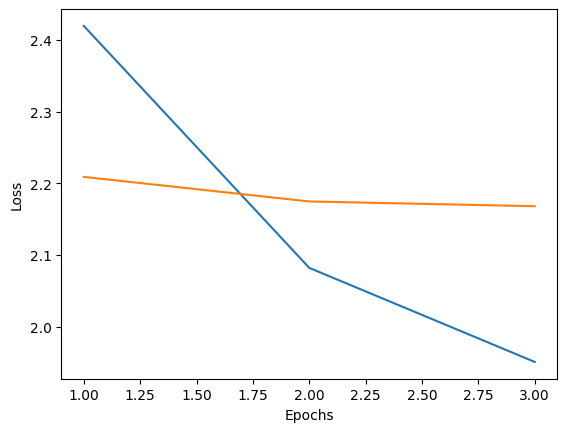

In [10]:
epochs = [1,2,3]
train_loss = [2.419300, 2.082000, 1.950900]
test_loss = [2.208840, 2.174603, 2.167969]

import matplotlib.pyplot as plt
plt.plot(epochs, train_loss, label='Train Loss')
plt.plot(epochs, test_loss, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0,6)
plt.legend()
plt.show()
